In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns', None, 'display.max_rows', None)

data = pd.read_csv('pems_sample.csv')
data.head()

,Hour,1119850-ML,1108509-ML,1126614-ML,1108512-ML,1119659-ML,1122507-ML,1119865-ML,1125314-ML,1119871-ML,1122512-ML,1119879-ML,1108651-ML,1119890-ML,1108663-ML,1119903-ML,1108682-ML,1119921-ML,1108687-ML,1108659-ML,1119928-ML,1119934-ML,1119941-ML,1119947-ML,1115289-ML,1115304-ML,1115306-ML,1115314-ML,1115323-ML,1119960-ML,1119972-ML,1119984-ML,1119990-ML,1121692-ML,1121707-ML,1121715-ML,1121724-ML,1121731-ML,1121737-ML,1204198-ML,1204211-ML,1204230-ML,1204244-ML,1204255-ML,1210908-ML,1204268-ML,1204279-ML,1213215-ML,1221232-ML,1204301-ML,1204316-ML,1204328-ML,1204340-ML,1204372-ML,1204384-ML,1204395-ML,1204409-ML,1210926-ML,1220030-ML,1204422-ML,1210974-ML,1210991-ML,1204436-ML,1204447-ML,1204453-ML,1211107-ML,1222006-ML,1221985-ML,1204472-ML,1204486-ML,1222018-ML,1204501-ML,1222023-ML,1213570-ML,1204515-ML,1221811-ML,1204532-ML,1221803-ML,1213700-ML,1221835-ML,1204546-ML,1204559-ML,1221843-ML,1204571-ML,1204586-ML,1213527-ML,1204615-ML,1204632-ML,1204638-ML,1204672-ML,1204682-ML,1204697-ML,1204699-ML,1204703-ML,1204731-ML,1204750-ML,1204766-ML,1204787-ML,1204808-ML,1204825-ML,1220011-ML,1204861-ML,1204878-ML,1204924-ML,1204937-ML,1204950-ML,1204982-ML,1205012-ML,1205045-ML,1205071-ML,1205088-ML,1205135-ML,1205152-ML,1205157-ML,1205165-ML,1205168-ML,1205175-ML,1205193-ML,1205204-ML,1205215-ML,1205225-ML,1205262-ML,1205269-ML,1205290-ML,1205303-ML,1205320-ML,1205330-ML,1205375-ML,1205341-ML,1205380-ML,1212001-ML,1205409-ML,1212115-ML,1212216-ML,1205432-ML,1205452-ML,1205473-ML,1205493-ML,1212649-ML,1205517-ML,1205528-ML,1212588-ML,1205553-ML,1205562-ML,1205567-ML,1205590-ML,1214005-ML,1205607-ML,1216505-ML,1205623-ML,1205636-ML,1205658-ML,1216538-ML,1205680-ML,762347-ML,716896-ML,716899-ML,716900-ML,762353-ML,775012-ML,716904-ML,718358-ML,769625-ML,718081-ML,718360-ML,759518-ML,759513-ML,715915-ML,715918-ML,764232-ML,763985-ML,759531-ML,759542-ML,759552-ML,715930-ML,716921-ML,715933-ML,716923-ML,763975-ML,716925-ML,715938-ML,716929-ML,764435-ML,715944-ML,718086-ML,716933-ML,759566-ML,759576-ML,716937-ML,763700-ML,716942-ML,763237-ML,716951-ML,718371-ML,716953-ML,763674-ML,763669-ML,716956-ML,759591-ML,775734-ML,759602-ML,761599-ML,761604-ML,718384-ML,716963-ML,716968-ML,716971-ML,716973-ML,716974-ML,716978-ML,716981-ML,716985-ML,716988-ML,716990-ML,716994-ML,761644-ML,716997-ML,717000-ML,775462-ML,764156-ML,718389-ML,718092-ML,768682-ML,768664-ML,768655-ML,759617-ML,718394-ML,759834-ML,759626-ML,759636-ML,774092-ML,718404-ML,775535-ML,763641-ML,775520-ML,716007-ML,759648-ML,768138-ML,769091-ML,759654-ML,759666-ML,716017-ML,769029-ML,769042-ML,769054-ML,759672-ML,759677-ML,716023-ML,759685-ML,# Lane Points,% Observed
0,3-14-2023 0:00,1.55,1.55,1.16,1.98,2.92,1.55,1.55,1.55,1.55,1.55,1.55,1.55,1.55,1.36,1.69,0.97,1.23,1.46,2.24,4.05,1.55,1.55,1.55,1.88,2.56,1.79,1.93,1.35,2.30,1.20,1.20,1.65,1.25,1.23,1.49,1.06,2.30,1.10,1.45,1.62,1.45,1.86,1.05,1.29,1.60,1.75,1.69,1.37,1.42,1.46,1.38,2.09,1.66,1.65,1.18,1.27,1.47,0.82,1.58,1.03,1.13,2.04,0.87,0.98,1.62,3.19,1.69,2.47,2.56,1.17,1.69,3.27,2.49,1.90,1.03,2.36,1.19,2.66,1.45,2.80,1.99,0.91,2.16,1.69,2.20,2.20,2.20,2.41,1.13,0.79,1.11,0.88,5.26,3.61,2.39,1.45,3.47,2.06,3.31,3.16,2.32,1.99,2.05,2.93,1.66,2.74,3.06,2.81,1.63,2.59,2.77,3.52,1.60,3.07,1.90,1.66,1.69,2.20,2.19,4.24,2.98,3.92,3.40,2.50,3.80,2.46,2.12,2.27,1.85,2.36,1.48,2.37,2.08,2.60,3.28,3.50,3.35,3.79,5.82,2.99,3.87,3.87,2.97,2.89,2.64,3.92,2.33,2.50,2.29,17.35,3.70,2.43,2.97,2.47,2.47,2.47,2.47,2.47,2.95,2.95,2.47,5.19,3.36,5.09,2.47,2.95,2.95,2.47,5.43,4.82,5.14,3.31,5.85,6.10,2.76,3.99,2.60,4.93,3.16,3.29,2.88,3.86,6.07,3.54,5.00,2.88,2.88,2.88,0.64,3.39,3.39,2.88,2.88,2.88,3.32,2.19,3.07,2.47,2.47,2.47,3.89,2.47,2.47,2.72,1.58,2.47,2.19,2.48,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,2.39,0.64,3.07,3.04,3.07,0.69,0.64,0.64,1.91,0.64,2.73,2.47,2.47,4.07,2.20,3.70,1.76,2.47,2.47,2.47,0.64,0.64,0.64,0.64,0.64,3.90,2.75,3.79,0.64,5.40,2.84,12780,42.25
1,3-14-2023 1:00,1.02,1.02,0.87,1.18,2.35,1.02,1.02,1.02,1.02,1.02

In [41]:
data.describe()

,1119850-ML,1108509-ML,1126614-ML,1108512-ML,1119659-ML,1122507-ML,1119865-ML,1125314-ML,1119871-ML,1122512-ML,1119879-ML,1108651-ML,1119890-ML,1108663-ML,1119903-ML,1108682-ML,1119921-ML,1108687-ML,1108659-ML,1119928-ML,1119934-ML,1119941-ML,1119947-ML,1115289-ML,1115304-ML,1115306-ML,1115314-ML,1115323-ML,1119960-ML,1119972-ML,1119984-ML,1119990-ML,1121692-ML,1121707-ML,1121715-ML,1121724-ML,1121731-ML,1121737-ML,1204198-ML,1204211-ML,1204230-ML,1204244-ML,1204255-ML,1210908-ML,1204268-ML,1204279-ML,1213215-ML,1221232-ML,1204301-ML,1204316-ML,1204328-ML,1204340-ML,1204372-ML,1204384-ML,1204395-ML,1204409-ML,1210926-ML,1220030-ML,1204422-ML,1210974-ML,1210991-ML,1204436-ML,1204447-ML,1204453-ML,1211107-ML,1222006-ML,1221985-ML,1204472-ML,1204486-ML,1222018-ML,1204501-ML,1222023-ML,1213570-ML,1204515-ML,1221811-ML,1204532-ML,1221803-ML,1213700-ML,1221835-ML,1204546-ML,1204559-ML,1221843-ML,1204571-ML,1204586-ML,1213527-ML,1204615-ML,1204632-ML,1204638-ML,1204672-ML,1204682-ML,1204697-ML,1204699-ML,1204703-ML,1204731-ML,1204750-ML,1204766-ML,1204787-ML,1204808-ML,1204825-ML,1220011-ML,1204861-ML,1204878-ML,1204924-ML,1204937-ML,1204950-ML,1204982-ML,1205012-ML,1205045-ML,1205071-ML,1205088-ML,1205135-ML,1205152-ML,1205157-ML,1205165-ML,1205168-ML,1205175-ML,1205193-ML,1205204-ML,1205215-ML,1205225-ML,1205262-ML,1205269-ML,1205290-ML,1205303-ML,1205320-ML,1205330-ML,1205375-ML,1205341-ML,1205380-ML,1212001-ML,1205409-ML,1212115-ML,1212216-ML,1205432-ML,1205452-ML,1205473-ML,1205493-ML,1212649-ML,1205517-ML,1205528-ML,1212588-ML,1205553-ML,1205562-ML,1205567-ML,1205590-ML,1214005-ML,1205607-ML,1216505-ML,1205623-ML,1205636-ML,1205658-ML,1216538-ML,1205680-ML,762347-ML,716896-ML,716899-ML,716900-ML,762353-ML,775012-ML,716904-ML,718358-ML,769625-ML,718081-ML,718360-ML,759518-ML,759513-ML,715915-ML,715918-ML,764232-ML,763985-ML,759531-ML,759542-ML,759552-ML,715930-ML,716921-ML,715933-ML,716923-ML,763975-ML,716925-ML,715938-ML,716929-ML,764435-ML,715944-ML,718086-ML,716933-ML,759566-ML,759576-ML,716937-ML,763700-ML,716942-ML,763237-ML,716951-ML,718371-ML,716953-ML,763674-ML,763669-ML,716956-ML,759591-ML,775734-ML,759602-ML,761599-ML,761604-ML,718384-ML,716963-ML,716968-ML,716971-ML,716973-ML,716974-ML,716978-ML,716981-ML,716985-ML,716988-ML,716990-ML,716994-ML,761644-ML,716997-ML,717000-ML,775462-ML,764156-ML,718389-ML,718092-ML,768682-ML,768664-ML,768655-ML,759617-ML,718394-ML,759834-ML,759626-ML,759636-ML,774092-ML,718404-ML,775535-ML,763641-ML,775520-ML,716007-ML,759648-ML,768138-ML,769091-ML,759654-ML,759666-ML,716017-ML,769029-ML,769042-ML,769054-ML,759672-ML,759677-ML,716023-ML,759685-ML,# Lane Points,% Observed
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0000

In [ ]:
pip install pyts

In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
data['Hour'] = pd.to_datetime(data['Hour'])
data = data.drop(columns = ['# Lane Points', '% Observed'])

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(data['Hour'], data['1108509-ML'], color = 'red')
plt.plot(data['Hour'], data['716017-ML'], color = 'gold')
plt.plot(data['Hour'], data['1205517-ML'], color = 'steelblue')
plt.grid()
plt.show()

In [ ]:
pip install pyts

In [ ]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

#Xtrain, Xtest = get_some_data() # both N x T time series samples
Xtrain = pd.concat([data['1108509-ML'], data['716017-ML'], data['1205517-ML'], data['1125314-ML']], axis = 1)


gaf = GramianAngularField(image_size = 1)
im_train = gaf.fit_transform(Xtrain)
#im_test = gaf.transform(Xtest)

# plot one image
plt.imshow(im_train[0])
plt.show()

In [ ]:
im_train

## Exploration

In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [4]:
## Importing libraries
import numpy as np
import torch

## Step 1: Prepping data set
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Step 2: Building the model
import torch.nn as nn
import torch.nn.functional as F

## Step 3: Training the model
import torch.optim as optim

### Step 1: Preparing the data set
- Splitting the images into train and test sets
- Preprocessing the images (normalizing speeds up learning)

In [2]:
## Downloading, splitting, and preprocessing the images
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 1, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 1, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


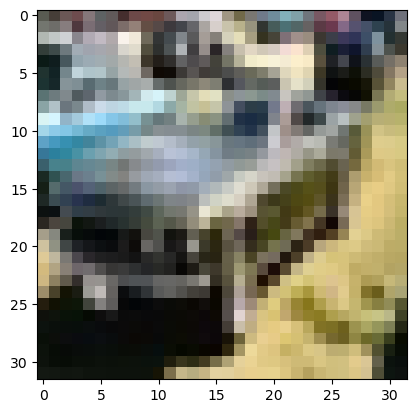

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [4]:
## Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.ion()
    plt.show()

## Getting some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## Showing images
imshow(torchvision.utils.make_grid(images))

## Printing image labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
for i, data in enumerate(trainloader, 0):
    
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    
    imshow(torchvision.utils.make_grid(inputs))

In [ ]:
torchvision.utils.make_grid(trainloader)

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

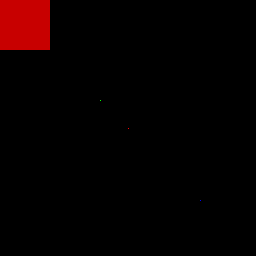

In [7]:
data = np.zeros((256, 256, 3), dtype = np.uint8)

data[128, 128] = [255, 0, 0]
data[100, 100] = [0, 255, 0]
data[200, 200] = [0, 0, 255]

for i in range(0, 50):
    data[i, 0:50] = [200, 0, 0]
image = Image.fromarray(data)

image.show()

In [43]:
data = data.drop(columns = ['Hour', '# Lane Points', '% Observed'])

In [44]:
data.shape

(84, 248)

In [45]:
data.head()

,1119850-ML,1108509-ML,1126614-ML,1108512-ML,1119659-ML,1122507-ML,1119865-ML,1125314-ML,1119871-ML,1122512-ML,1119879-ML,1108651-ML,1119890-ML,1108663-ML,1119903-ML,1108682-ML,1119921-ML,1108687-ML,1108659-ML,1119928-ML,1119934-ML,1119941-ML,1119947-ML,1115289-ML,1115304-ML,1115306-ML,1115314-ML,1115323-ML,1119960-ML,1119972-ML,1119984-ML,1119990-ML,1121692-ML,1121707-ML,1121715-ML,1121724-ML,1121731-ML,1121737-ML,1204198-ML,1204211-ML,1204230-ML,1204244-ML,1204255-ML,1210908-ML,1204268-ML,1204279-ML,1213215-ML,1221232-ML,1204301-ML,1204316-ML,1204328-ML,1204340-ML,1204372-ML,1204384-ML,1204395-ML,1204409-ML,1210926-ML,1220030-ML,1204422-ML,1210974-ML,1210991-ML,1204436-ML,1204447-ML,1204453-ML,1211107-ML,1222006-ML,1221985-ML,1204472-ML,1204486-ML,1222018-ML,1204501-ML,1222023-ML,1213570-ML,1204515-ML,1221811-ML,1204532-ML,1221803-ML,1213700-ML,1221835-ML,1204546-ML,1204559-ML,1221843-ML,1204571-ML,1204586-ML,1213527-ML,1204615-ML,1204632-ML,1204638-ML,1204672-ML,1204682-ML,1204697-ML,1204699-ML,1204703-ML,1204731-ML,1204750-ML,1204766-ML,1204787-ML,1204808-ML,1204825-ML,1220011-ML,1204861-ML,1204878-ML,1204924-ML,1204937-ML,1204950-ML,1204982-ML,1205012-ML,1205045-ML,1205071-ML,1205088-ML,1205135-ML,1205152-ML,1205157-ML,1205165-ML,1205168-ML,1205175-ML,1205193-ML,1205204-ML,1205215-ML,1205225-ML,1205262-ML,1205269-ML,1205290-ML,1205303-ML,1205320-ML,1205330-ML,1205375-ML,1205341-ML,1205380-ML,1212001-ML,1205409-ML,1212115-ML,1212216-ML,1205432-ML,1205452-ML,1205473-ML,1205493-ML,1212649-ML,1205517-ML,1205528-ML,1212588-ML,1205553-ML,1205562-ML,1205567-ML,1205590-ML,1214005-ML,1205607-ML,1216505-ML,1205623-ML,1205636-ML,1205658-ML,1216538-ML,1205680-ML,762347-ML,716896-ML,716899-ML,716900-ML,762353-ML,775012-ML,716904-ML,718358-ML,769625-ML,718081-ML,718360-ML,759518-ML,759513-ML,715915-ML,715918-ML,764232-ML,763985-ML,759531-ML,759542-ML,759552-ML,715930-ML,716921-ML,715933-ML,716923-ML,763975-ML,716925-ML,715938-ML,716929-ML,764435-ML,715944-ML,718086-ML,716933-ML,759566-ML,759576-ML,716937-ML,763700-ML,716942-ML,763237-ML,716951-ML,718371-ML,716953-ML,763674-ML,763669-ML,716956-ML,759591-ML,775734-ML,759602-ML,761599-ML,761604-ML,718384-ML,716963-ML,716968-ML,716971-ML,716973-ML,716974-ML,716978-ML,716981-ML,716985-ML,716988-ML,716990-ML,716994-ML,761644-ML,716997-ML,717000-ML,775462-ML,764156-ML,718389-ML,718092-ML,768682-ML,768664-ML,768655-ML,759617-ML,718394-ML,759834-ML,759626-ML,759636-ML,774092-ML,718404-ML,775535-ML,763641-ML,775520-ML,716007-ML,759648-ML,768138-ML,769091-ML,759654-ML,759666-ML,716017-ML,769029-ML,769042-ML,769054-ML,759672-ML,759677-ML,716023-ML,759685-ML
0,1.55,1.55,1.16,1.98,2.92,1.55,1.55,1.55,1.55,1.55,1.55,1.55,1.55,1.36,1.69,0.97,1.23,1.46,2.24,4.05,1.55,1.55,1.55,1.88,2.56,1.79,1.93,1.35,2.30,1.20,1.20,1.65,1.25,1.23,1.49,1.06,2.30,1.10,1.45,1.62,1.45,1.86,1.05,1.29,1.60,1.75,1.69,1.37,1.42,1.46,1.38,2.09,1.66,1.65,1.18,1.27,1.47,0.82,1.58,1.03,1.13,2.04,0.87,0.98,1.62,3.19,1.69,2.47,2.56,1.17,1.69,3.27,2.49,1.90,1.03,2.36,1.19,2.66,1.45,2.80,1.99,0.91,2.16,1.69,2.20,2.20,2.20,2.41,1.13,0.79,1.11,0.88,5.26,3.61,2.39,1.45,3.47,2.06,3.31,3.16,2.32,1.99,2.05,2.93,1.66,2.74,3.06,2.81,1.63,2.59,2.77,3.52,1.60,3.07,1.90,1.66,1.69,2.20,2.19,4.24,2.98,3.92,3.40,2.50,3.80,2.46,2.12,2.27,1.85,2.36,1.48,2.37,2.08,2.60,3.28,3.50,3.35,3.79,5.82,2.99,3.87,3.87,2.97,2.89,2.64,3.92,2.33,2.50,2.29,17.35,3.70,2.43,2.97,2.47,2.47,2.47,2.47,2.47,2.95,2.95,2.47,5.19,3.36,5.09,2.47,2.95,2.95,2.47,5.43,4.82,5.14,3.31,5.85,6.10,2.76,3.99,2.60,4.93,3.16,3.29,2.88,3.86,6.07,3.54,5.00,2.88,2.88,2.88,0.64,3.39,3.39,2.88,2.88,2.88,3.32,2.19,3.07,2.47,2.47,2.47,3.89,2.47,2.47,2.72,1.58,2.47,2.19,2.48,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,2.39,0.64,3.07,3.04,3.07,0.69,0.64,0.64,1.91,0.64,2.73,2.47,2.47,4.07,2.20,3.70,1.76,2.47,2.47,2.47,0.64,0.64,0.64,0.64,0.64,3.90,2.75,3.79,0.64,5.40,2.84
1,1.02,1.02,0.87,1.18,2.35,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,0.96,0.81,0.86,1.05,1.43,3.27,1.02,1.02,1.02,1.35,2

In [47]:
tester = np.array(data)
tester

array([[ 1.55,  1.55,  1.16, ...,  0.64,  5.4 ,  2.84],
       [ 1.02,  1.02,  0.87, ...,  0.34,  5.29,  2.57],
       [ 0.82,  0.82,  1.1 , ...,  0.25,  4.59,  2.07],
       ...,
       [ 9.74,  9.74,  9.64, ...,  6.38,  5.46,  3.85],
       [10.24, 10.24, 10.28, ...,  6.48,  6.76,  5.26],
       [10.86, 10.86, 10.32, ...,  6.93,  8.19,  6.58]])

In [48]:
tester.shape

(84, 248)

In [52]:
tester[0:50, 1:10] = np.nan

In [ ]:
tester = tester.flatten()

for i in range(len(tester)):
    
    ## If np.nan, assign -1
    if (np.isnan(tester[i])):
        tester[i] = 

dat = dat.reshape((84, 248))

In [50]:
plt.imsave('files/testimage.png', tester, cmap = 'gist_gray', vmin = 0, vmax = 100)

In [20]:
dat.flatten().reshape((2, 3))

array([[2, 3, 4],
       [1, 2, 3]])

In [38]:
## Initialize 200 x 200 array
dat = np.zeros((200, 200)).flatten()

## Loop through each element in the flattened array
for ii in range(40000):
    
    ## If np.nan, assign -1
    
    ## Else, assign value of traffic in grey scale
    dat[ii] = np.random.uniform(low = 80, high = 100, size = 1)
    
dat = dat.reshape((200, 200))

In [37]:
plt.imsave('files/testimage.png', dat, cmap = 'Greys', vmin = 0, vmax = 100)

In [35]:
plt.imsave('files/testimage.png', dat, cmap = 'gist_gray', vmin = 0, vmax = 100)

### Step 2: Building the network

In [ ]:
## Defining the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)   # first convolutional layer
        self.pool = nn.MaxPool2d(2, 2)    # max pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
net

### Step 3: Training the network

In [ ]:
## Defining loss function and optimizer (cross-entropy loss and SGD with momentum)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

## Training the model
for epoch in range(5):  # loop over the dataset multiple times (5 epochs)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# save trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Testing the network

In [ ]:
## Displaying images from test set
dataiter = iter(testloader)
images, labels = next(dataiter)

## Printing images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Loading trained network (only needed if you exited ipython after training)
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting object categories predicted by the network
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

## Computing accuracy on the full test data set (10,000 images)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

## Investigating performance per object categoryclass_correct = list(0. for i in range(10))
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))